<a href="https://colab.research.google.com/drive/1bZbgbvWvr8pMKEfnOWYY4Rme3byH0wKN" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การบ้านสัปดาห์ที่ 4
- ความเข้าใจเกี่ยวกับการประมวลภาพด้วย Morphology process เช่น erosion dilation, opening, closing และการนำไปประยุกต์ใช้งาน



In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
from skimage.util import img_as_ubyte
from google.colab.patches import cv2_imshow

ให้นักศึกษาทดสอบรันโปรแกรมด้านล่างแล้วสังเกตผลลัพธ์ของการทำ morphology 

- ผลลัพธ์จากการเลือกใช้ structure element ที่มีลักษณะต่างกัน (เลือก uncomment SE ที่ต้องการทดสอบ SE1-SE4) 

- ผลลัพธ์จากการทำ erosion หรือ dilation


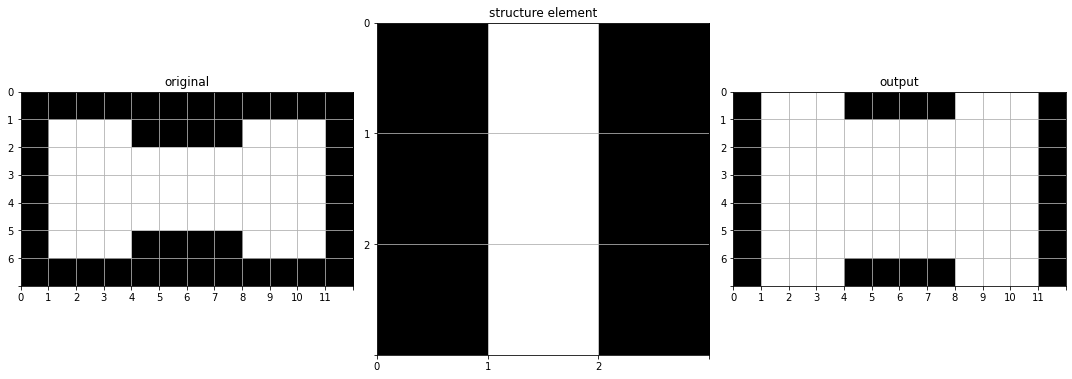

In [ ]:
data=np.array([[0,0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ,0],
               [0,255,255,255,0  ,0  ,0  ,0  ,255,255,255,0],
               [0,255,255,255,255,255,255,255,255,255,255,0],
               [0,255,255,255,255,255,255,255,255,255,255,0],
               [0,255,255,255,255,255,255,255,255,255,255,0],
               [0,255,255,255,0  ,0  ,0  ,0  ,255,255,255,0],
               [0,0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ,0]],np.uint8)

horizontal_SE=np.array([[0  ,0  ,0  ],
                        [255,255,255],
                        [0  ,0  ,0  ]],np.uint8)

vertical_SE=np.array([[0,255,0],
                      [0,255,0],
                      [0,255,0]],np.uint8)

sqr_SE = np.ones((3,3),np.uint8)


plus_SE=np.array([[0,255,0],
                      [255,255,255],
                      [0,255,0]],np.uint8)

kernel=vertical_SE            #SE1
#kernel=horizontal_SE        #SE2
#kernel=sqr_SE               #SE3 
#kernel=plus_SE              #SE4 
#processed=cv2.erode(data,kernel,iterations=1)     #erosion
processed=cv2.dilate(data,kernel,iterations=1)     #dilation



#โค๊ดส่วนแสดงผล
fig, ((original_dis,SE_dis, output_dis)) = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(15)
fig.set_figheight(15)


original_dis.set_xticks(np.arange(-.5, 12, 1))
original_dis.set_yticks(np.arange(-.5, 7, 1))
original_dis.set_xticklabels(np.arange(0, 12, 1))
original_dis.set_yticklabels(np.arange(0, 7, 1))

original_dis.imshow(data,'gray')
original_dis.title.set_text('original')
original_dis.grid()

SE_dis.set_xticks(np.arange(-.5, 3, 1))
SE_dis.set_yticks(np.arange(-.5, 3, 1))
SE_dis.set_xticklabels(np.arange(0, 3, 1))
SE_dis.set_yticklabels(np.arange(0, 3, 1))

SE_dis.imshow(kernel,'gray')
SE_dis.title.set_text('structure element')
SE_dis.grid()

output_dis.set_xticks(np.arange(-.5, 12, 1))
output_dis.set_yticks(np.arange(-.5, 7, 1))
output_dis.set_xticklabels(np.arange(0, 12, 1))
output_dis.set_yticklabels(np.arange(0, 7, 1))

output_dis.imshow(processed,'gray')
output_dis.title.set_text('output')
output_dis.grid()


fig.tight_layout()
plt.show()

## แบบฝึกหัดที่ 4.1
**วัตถุประสงค์:** เพื่อทดสอบความเข้าใจเกี่ยวกับการทำ morphology และการนำไปประยุกต์ใช้ 

**โจทย์:**
จงเขียนโปรแกรมเพื่อทำการ cleanup noise และปรับปรุงภาพ finger print ด้วยการใช้เทคนิค morphology พร้อมอธิบายหลักการทำงานของโค๊ดที่เขียนด้วยข้อความสั้นๆ 


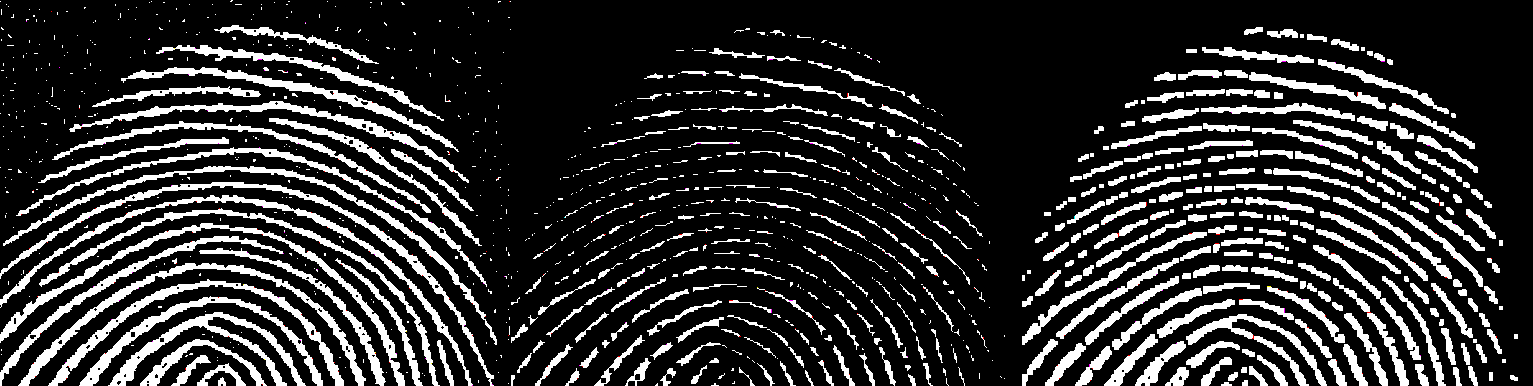

In [ ]:
url="https://github.com/jbinteam/010723305/blob/main/images/fingerPrint.png?raw=true"

fingerPrint_img = io.imread(url)
original_img = img_as_ubyte(fingerPrint_img)

## เขียนโค๊ดลงด้านล่างนี้
kernelE = np.ones((2,2), np.uint8)  # สร้าง kernel สำหรับกรองภาพในขั้นตอน erodtion แบบ 2x2
kernelD = np.ones((4, 4), np.uint8) # สร้าง kernel สำหรับกรองภาพในขั้นตอน dilation แบบ 4x4
erodtion = cv2.erode(original_img,kernelE,iterations=3) # นำภาพ original_img มาทำการ erodtion โดยเป็น array แบบ 2:2
dilation = cv2.dilate(erodtion,kernelD,iterations=1)    # นำภาพที่ผ่านการ erodtion มาทำการ dilation เพื่อขยายรายละเอียดในรูปภาพ

#img_dilation = np.hstack((original_img,dilation))
img_ED = np.hstack((original_img,erodtion,dilation)) # รวมภาพจากขั้นตอนต่างๆ

#cv2_imshow(img_dilation)
cv2_imshow(img_ED) #แสดงภาพที่ได้


## แบบฝึกหัดที่ 4.2
**วัตถุประสงค์:** เพื่อทดสอบความเข้าใจเกี่ยวกับการทำ morphology และการนำไปประยุกต์ใช้ 

**โจทย์:**
จงเขียนโปรแกรมเพื่อทำการสะกัดเส้นรอบรูปของเครื่องบินจากภาพที่กำหนดให้ ด้วยการใช้เทคนิค morphology พร้อมอธิบายหลักการทำงานของโค๊ดที่เขียนด้วยข้อความสั้นๆ

<img align="left" width="200" height="200" src="https://github.com/jbinteam/010723305/blob/main/images/airplane_output.png?raw=true">

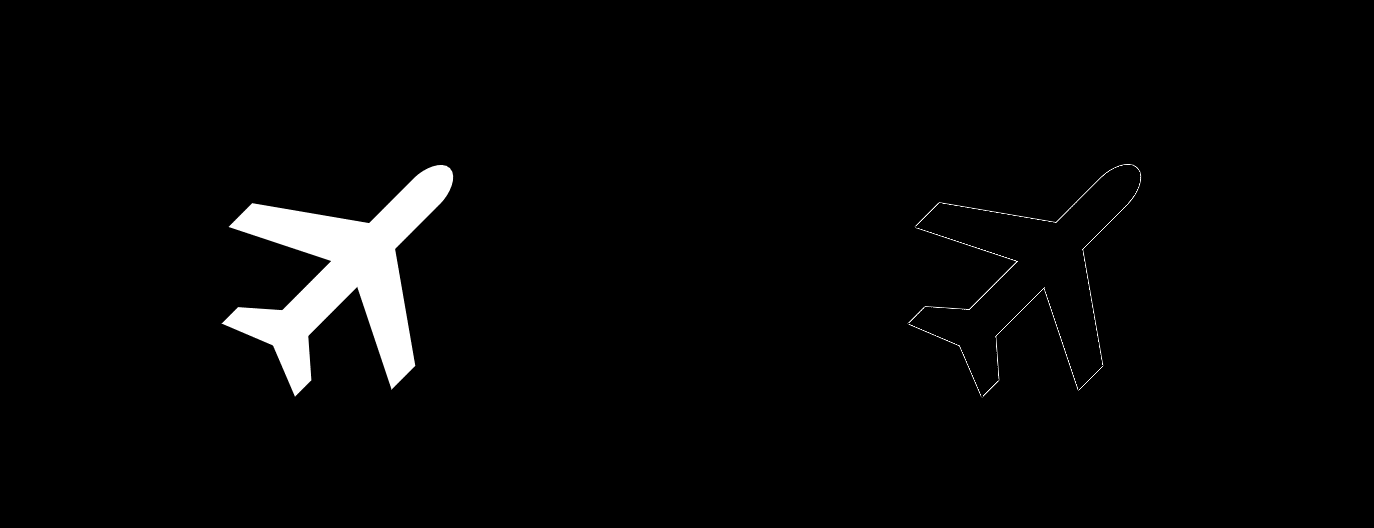

In [10]:
  airplane_url="https://github.com/jbinteam/010723305/blob/main/images/airplane.png?raw=true"

  airplane_img = io.imread(airplane_url)
  original_img = img_as_ubyte(airplane_img)
  
  ## เขียนโค๊ดลงด้านล่างนี้
  img_gray = cv2.cvtColor(original_img,cv2.COLOR_RGB2GRAY)   # แปลงภาพต้นฉบับให้เป็นภาพขาวดำ Gray Scale
  lap = np.array([[0,1,0],[1,-4,1],[0,1,0]])
  grad = cv2.filter2D(img_gray,-1,lap)
  img_sw = np.hstack((img_gray,grad)) #รวมภาพจากขั้นตอนต่างๆ 

  cv2_imshow(img_sw)  #แสดงภาพที่ได้เทียบกับภาพต้นฉบับ

